In [166]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

In [167]:
data = pd.read_csv('data_DL/dataset.csv')

In [168]:
data.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [169]:
print('Number of records:\t', data.shape[0])
print('Number of attributes:\t', data.shape[1])

Number of records:	 19906
Number of attributes:	 2


In [170]:
duplicates = data[data.duplicated()]
print('Number of duplicate rows:', duplicates.shape[0])

Number of duplicate rows: 0


In [171]:
missing = data[data.isnull().any(axis=1)]
print('Number of rows with missing value:', duplicates.shape[0])

Number of rows with missing value: 0


In [172]:
image_path = 'data_DL\\images'

missing_images = []

for img_name in data['ID']:
    img_file = os.path.join(image_path, img_name)
    if not os.path.exists(img_file):
        missing_images.append(img_name)

print('Number of missing images (jpg):', len(missing_images))

Number of missing images (jpg): 0


In [173]:
print(data['Class'].value_counts())

Class
MIDDLE    10804
YOUNG      6706
OLD        2396
Name: count, dtype: int64


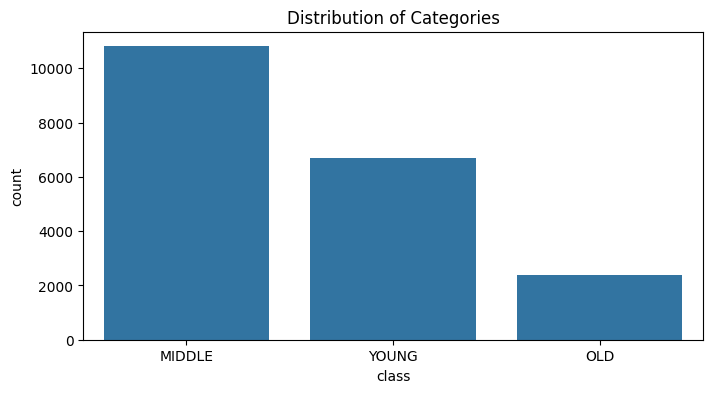

In [174]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Class', data=data)
plt.xlabel('class') 
plt.title('Distribution of Categories')
plt.show()

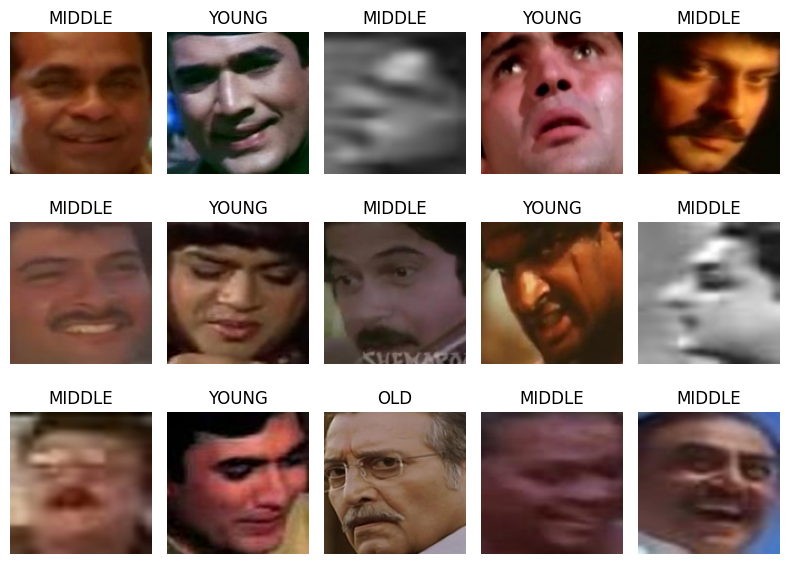

In [175]:
image_dir = 'data_DL\\images'
sample_data = data.sample(15)

fig, axes = plt.subplots(3, 5, figsize=(8, 6))
axes = axes.flatten()

for i, (index, row) in enumerate(sample_data.iterrows()):
    img_id = row['ID']
    category = row['Class']

    img_path = os.path.join(image_dir, img_id)
    img = Image.open(img_path)

    img = img.resize((128, 128))

    axes[i].imshow(img)
    axes[i].set_title(category)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [176]:
data['image_path'] = data['ID'].apply(lambda x: os.path.join(image_dir, x))

In [ ]:
def image_to_numpy(img_path):
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    
    img_resized = tf.image.resize(img_array, (128, 128))
    
    return img_resized.numpy()

In [178]:
data['image_data'] = data['image_path'].apply(lambda x: image_to_numpy(x))
data.head()

,ID,Class,image_path,image_data
0,377.jpg,MIDDLE,data_DL\images\377.jpg,"[[[51.0, 47.0, 48.0], [51.0, 47.0, 48.0], [51...."
1,17814.jpg,YOUNG,data_DL\images\17814.jpg,"[[[47.0, 30.0, 36.0], [47.0, 30.0, 36.0], [47...."
2,21283.jpg,MIDDLE,data_DL\images\21283.jpg,"[[[43.98047, 39.98047, 38.98047], [43.98047, 3..."
3,16496.jpg,YOUNG,data_DL\images\16496.jpg,"[[[21.0, 21.0, 21.0], [21.0, 21.0, 21.0], [21...."
4,4487.jpg,MIDDLE,data_DL\images\4487.jpg,"[[[31.398438, 30.398438, 36.398438], [29.26171..."


In [179]:
data = pd.get_dummies(data, columns=['Class'], prefix='class')
data = data.drop(['ID', 'image_path'], axis=1)

data[['class_MIDDLE', 'class_OLD', 'class_YOUNG']] = data[['class_MIDDLE', 'class_OLD', 'class_YOUNG']].astype(int)

data.head()

,image_data,class_MIDDLE,class_OLD,class_YOUNG
0,"[[[51.0, 47.0, 48.0], [51.0, 47.0, 48.0], [51....",1,0,0
1,"[[[47.0, 30.0, 36.0], [47.0, 30.0, 36.0], [47....",0,0,1
2,"[[[43.98047, 39.98047, 38.98047], [43.98047, 3...",1,0,0
3,"[[[21.0, 21.0, 21.0], [21.0, 21.0, 21.0], [21....",0,0,1
4,"[[[31.398438, 30.398438, 36.398438], [29.26171...",1,0,0


In [ ]:
X = tf.convert_to_tensor(data['image_data'].to_numpy(), dtype=tf.float32)
y = tf.convert_to_tensor(data[['class_YOUNG', 'class_MIDDLE', 'class_OLD']].to_numpy(), dtype=tf.float32)